## Анализ популярности белорусских исполнителей на сайтике с аккордами

В моем проекте я хочу проанализировать популярность белорусских исполнителей на замечательном сайте для гитаристов https://amdm.ru/. Для этого я буду брать страницы исполнителей и смотреть, сколько просмотров набирают подборы аккордов к их песням.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

Все эти замечательные библиотеки понабятся мне, чтобы распарсить html в нормальную читаемую табличку. Использовала я для этого этот [туториал](https://www.datacamp.com/community/tutorials/web-scraping-using-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001493&gclid=CjwKCAiAiML-BRAAEiwAuWVggvGRuNDrO-xoeNT5NJUozEjR1E0pVZz1uYNMRuo3uu-IBb8j_kwGMxoCmlMQAvD_BwE). Прокомментирую некоторые библиотеки:
* библиотека urlopen нам понадобится для открытия url адресов
* библиотека с красивым названием BeautifulSoup поможет нам извлечь данные из html 

Теперь перейдем непосредственно к нашей задаче. Начнем с замечательной группы NRM. Для начала просто возьмем страничку со списком ее песен и распарсим с помощью красивого супа. Как можно увидеть, тип получившегося супа - суп.

In [2]:
url = "https://amdm.ru/akkordi/nrm/"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

Ради интереса можно вывести наш суп и посмотреть, что он из себя представляет. 

In [3]:
# soup

Это займет много места и некрасиво выглядит, так что оставим это читателю.
Мы увидим, что необходимая нам информация обернута в тег \<td>, и содержит внутри еще всякий мусор. Избавимся от этого мусора и положим всю необходимую нам информацию в таблицу данных.

In [4]:
data = soup.find_all("td")
bs4names = data[0::3]
names = [name.get_text() for name in bs4names]
    
bs4views = data[2::3]
views = [int(view.get_text().replace(',', '')) for view in data[2::3]]
    
df = pd.DataFrame({"Название" : names, "Просмотры" : views})
df = df[df.Название != ''] # это нужно потому, что на страничке есть еще рейтинг пользователей,
# цифры которого тоже записываются в таблицу, а нам они не нужны
df

,Название,Просмотры
0,"Jura, jolki-palki, Kola",2122
1,Majo Pakalennie,6064
2,Prastora,5051
3,Белыя лебедзi,2753
4,Бывай,7360
5,Дзе тое слова?,3419
6,Дзед Мароз,3291
7,Зямля,9716
8,Калі ідуць на абардаж,3076
9,"Катуй, ратуй",7020


Ну кажется, уже получилось неплохо. Осталось проанализировать наши данные. Для этого вынесем весь наш замечательный код в отдельную функцию, и соберем таблички для некоторых белорусских исполнителей. Для сравнения я выбрала несколько популярных русских исполнителей и собрала для них таблички тоже. Всех исполнителей я подбирала вручную, потому что на моем любимом сайте нет никаких тегов для исполнителей, более того, даже нет никакого списка, так что как это автоматизировать, я не придумала.

In [5]:
def make_data_frame(url):
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    data = soup.find_all("td")
    
    bs4names = data[0::3]
    names = [name.get_text() for name in bs4names]
    
    bs4views = data[2::3]
    views = [int(view.get_text().replace(',', '')) for view in data[2::3]]
    
    df = pd.DataFrame({"Название" : names, "Просмотры" : views})
    df = df[df.Название != '']
    performer_name = soup.find_all("title")[0].get_text()
    performer_name = performer_name[:performer_name.find("подборы") - 1]
    return [df, performer_name]

Выбор исполнителей совершенно субъективен. Я попыталась не забыть никого из популярных. К некоторым я заходила на страничку, видела там всего один подбор и уходила (так было например с отличной группой NaviBand), потому что в своем проекте меня интересуют именно действительно популярные на сайте с аккордами песни и исполнители. Если читатель считает, что я кого-то забыла, или наоборот, зря включила список, он вправе удалить или добавить кого угодно и перезапустить код заново.

In [6]:
bel_performers = ["https://amdm.ru/akkordi/nrm/", 
                  "https://amdm.ru/akkordi/nizkiz/", 
                  "https://amdm.ru/akkordi/lapis_trybeckoi/", 
                  "https://amdm.ru/akkordi/lsp/", 
                  "https://amdm.ru/akkordi/kassiopeya/", 
                  "https://amdm.ru/akkordi/bez_bileta/", 
                  "https://amdm.ru/akkordi/lyavon_volski/", #его я рассмотрела отдельно, так как много сольников
                  "https://amdm.ru/akkordi/jmors/",
                  "https://amdm.ru/akkordi/neiro_dubel/", 
                  "https://amdm.ru/akkordi/razbitae_serca_pacana/", 
                  "https://amdm.ru/akkordi/bi_2/", 
                  "https://amdm.ru/akkordi/petlya_pristrastiya/", 
                  "https://amdm.ru/akkordi/kraski/",
                  "https://amdm.ru/akkordi/dai_darogy/",
                  "https://amdm.ru/akkordi/pesnari/",
                  "https://amdm.ru/akkordi/maks_korzh/",
                  "https://amdm.ru/akkordi/tima_belorusskih/",
                  "https://amdm.ru/akkordi/brutto/",
                  "https://amdm.ru/akkordi/dzieciuki/",
                  "https://amdm.ru/akkordi/respublika_polina/",
                  "https://amdm.ru/akkordi/krambambulya/"
                 ]

Информация в целом о популярных исполнителях немного объективнее, так как на моем любимом сайте есть вкладка "популярные исполнители". Опять же, это все прошло через мой субъективный вгляд. Так получилось, что все популярные исполнители - русскоязычные, возможно, это связано с тем, что сайт русский и песни у коста принято петь тоже в русскоязычном обществе. Впрочем, это ничего страшного.

In [7]:
popular_performers = ["https://amdm.ru/akkordi/kino/",
                      "https://amdm.ru/akkordi/bymboks/",
                      "https://amdm.ru/akkordi/basta/",
                      "https://amdm.ru/akkordi/sektor_gaza/",
                      "https://amdm.ru/akkordi/5nizza/",
                      "https://amdm.ru/akkordi/ddt/",
                      "https://amdm.ru/akkordi/aria/",
                      "https://amdm.ru/akkordi/splin/",
                      "https://amdm.ru/akkordi/agata_kristi/",
                      "https://amdm.ru/akkordi/lube/",
                      "https://amdm.ru/akkordi/zveri/",
                      "https://amdm.ru/akkordi/jyki/",
                      "https://amdm.ru/akkordi/grajdanskaa_oborona/",
                      "https://amdm.ru/akkordi/naytilys_pompiliys/",
                      "https://amdm.ru/akkordi/valentin_strikalo/",
                     ]

In [8]:
bel_data = dict()
for performer in bel_performers:
    data = make_data_frame(performer)
    if data[0].size < 10:
        continue
    bel_data[data[1]] = data[0]

In [9]:
pop_data = dict()
for performer in popular_performers:
    data = make_data_frame(performer)
    if data[0].size < 10:
        continue
    pop_data[data[1]] = data[0]

Итак, у нас есть два больших словаря. Осталось что нибудь проанализировать и сделать выводы!

### Исследования

Каждый результат будем оборачивать в DataFrame (в целом для красоты).\
Оценим каждого исполнителя по максимальной популярности его песни.

In [10]:
bel_names = [key for key, value in bel_data.items()]
bel_views_max_name = [value.loc[value.Просмотры.argmax()]["Название"] for key, value in bel_data.items()]
bel_views_max_views = [value.loc[value.Просмотры.argmax()]["Просмотры"] for key, value in bel_data.items()]
bel_max = pd.DataFrame({"Название" : bel_names, "Песня" : bel_views_max_name, "Просмотры" : bel_views_max_views})
bel_max.sort_values(by="Просмотры", ascending=False)

,Название,Песня,Просмотры
2,Ляпис Трубецкой,В платье белом,1843742
10,Би-2,Серебро,1178239
15,Макс Корж,Мотылек,580253
16,Тима Белорусских,Мокрые кроссы,357552
3,ЛСП,Тело,208451
0,N.R.M.,Тры чарапахi,166353
17,BRUTTO,12 обезьян,117337
14,Песняры,Беловежская пуща,79364
12,Краски,Старший брат,48236
19,Республика Полина,Сарафан,44391


In [11]:
pop_names = [key for key, value in pop_data.items()]
pop_views_max_name = [value.loc[value.Просмотры.argmax()]["Название"] for key, value in pop_data.items()]
pop_views_max_views = [value.loc[value.Просмотры.argmax()]["Просмотры"] for key, value in pop_data.items()]
pop_max = pd.DataFrame({"Название" : pop_names, "Песня" : pop_views_max_name, "Просмотры" : pop_views_max_views})
pop_max.sort_values(by="Просмотры", ascending=False)

,Название,Песня,Просмотры
0,Виктор Цой,Кукушка,8412111
1,Бумбокс,Вахтерам,7398374
2,Баста,Сансара,6889958
3,Сектор Газа,Лирика,4260388
4,5nizza,Я солдат,4158582
5,ДДТ,Что такое осень,4095432
6,Ария,Беспечный ангел,3942722
7,Сплин,Выхода нет,3737537
8,Агата Кристи,Как на войне,3554077
9,Любэ,Ты неси меня река,3142437


Среди общих популярных исполнителей первые три места оказались довольно предсказуемыми. Действительно, кого как не Цоя всегда поют у костров и в лагерях! Среди белорусских исполнителей все немного более неочевидно: хотя Ляписы и заняли заслуженное первое место, NRM даже не попали в пятерку. Эту легендарную группу вытеснили из топов молодые исполнители, Тима Белорусских и Макс Корж. Ну, не будем делать преждевременных выводов.

Теперь хочется посмотреть на среднее количество просмотров для каждой группы.

In [12]:
bel_views_mean = [round(value.mean()[0], 2) for key, value in bel_data.items()]
bel_means = pd.DataFrame({"Название" : bel_names, "Среднее по просмотрам" : bel_views_mean})
bel_means.sort_values(by="Среднее по просмотрам", ascending=False)

,Название,Среднее по просмотрам
15,Макс Корж,59868.94
2,Ляпис Трубецкой,52447.73
16,Тима Белорусских,47264.66
10,Би-2,39363.75
3,ЛСП,19763.86
14,Песняры,15764.33
0,N.R.M.,13692.95
12,Краски,13150.14
17,BRUTTO,12623.84
1,Nizkiz,8149.83


In [13]:
pop_views_mean = [round(value.mean()[0], 2) for key, value in pop_data.items()]
pop_means = pd.DataFrame({"Название" : pop_names, "Среднее по просмотрам" : pop_views_mean})
pop_means.sort_values(by="Среднее по просмотрам", ascending=False)

,Название,Среднее по просмотрам
0,Виктор Цой,199944.24
1,Бумбокс,106121.70
11,Жуки,99394.85
3,Сектор Газа,82271.98
9,Любэ,71212.00
2,Баста,69719.74
10,Звери,65783.96
4,5nizza,63300.78
14,Валентин Стрыкало,58436.34
7,Сплин,49518.21


Из грустного: белорусские исполнители едва-едва попадают даже в топ-10 по всем.

Среди общих популярных песен не обнаружилось ничего интересного, топ-4 не поменялся да и удивления по прежнему ничего не вызывает, разве что Стрыкало поднялся с последнего места. А вот у белорусов гораздо интереснее: оказывается, по среднему количеству просмотров Корж опережает все белорусские легенды! Так может, Ляписы считаются популярными только из-за одной песни? И вообще, ведь достаточно часто исполнитель страновится известным только из-за одной или двух успешных песен. Давайте введем коэффициент справедливости: отношение среднего количества просмотров к максимальной по просмотрам песне. Чем меньше этот коеффициент, тем менее справедливо попал в топы исполнитель. И наоборот, чем ближе к единице, тем преданнее фанаты: играют и поют примерно в равной степени все песни.

In [14]:
bel_coefs = (pair[0] / pair[1] for pair in zip(bel_views_mean, bel_views_max_views))
bel_df_coefs = pd.DataFrame({"Название" : bel_names, "Коэф. справедливости" : bel_coefs})
bel_df_coefs.sort_values(by="Коэф. справедливости", ascending=False)

,Название,Коэф. справедливости
4,Кассиопея,0.516479
18,DZIECIUKI,0.431782
9,Разбітае Сэрца Пацана,0.410974
20,Крамбамбуля,0.368721
1,Nizkiz,0.307228
12,Краски,0.272621
11,Петля Пристрастия,0.239982
6,Лявон Вольскі,0.212301
5,Без Билета,0.210940
14,Песняры,0.198633


Ничего себе! Получается, Ляписы действительно известны буквально по нескольким песням! Ладно, им можно это простить за счет большого количества песен в целом: знать все может только настоящий ценитель. Зато по этому параметру вырываются вперед малоизвестные группы: Кассиопея, Дзецюкі, РСП, Крамбамбуля. А вот пятое место вызывает уважение. Группа Nizkiz не только заняла 13е и 10е место по просмотрам, что в целом отличный результат, но еще и оказалась в топе по справедливости. Гитаристы одобряют.

Ради интереса посмотрим, что нам коэффициент скажет про популярные группы.

In [15]:
pop_coefs = (pair[0] / pair[1] for pair in zip(pop_views_mean, pop_views_max_views))
pop_df_coefs = pd.DataFrame({"Название" : pop_names, "Коэф. справедливости" : pop_coefs})
pop_df_coefs.sort_values(by="Коэф. справедливости", ascending=False)

,Название,Коэф. справедливости
14,Валентин Стрыкало,0.039044
11,Жуки,0.035808
0,Виктор Цой,0.023769
10,Звери,0.022883
9,Любэ,0.022661
13,Наутилус Помпилиус,0.022367
3,Сектор Газа,0.019311
4,5nizza,0.015222
1,Бумбокс,0.014344
12,Гражданская Оборона,0.014074


Цой даже тут впереди. Однако нельзя не отметить, что среди этого топа Ляписы оказались бы всего на третьем месте. Получается, что фанаты белорусских групп в целом горазо более преданные и любят все творчество исполнителей. А Цой всего лишь накручивает просмотры своими Восьмиклассницами и Пачками сигарет. \
Для меня оказалось удивительным, что самый маленький коэффициент справедливости получила замечательная группа ДДТ. По всей видимости, у них много неизвестных, но от этого, я уверена, не менее хороших песен.

Заметим, что менее популярные группы получают бОльший коэффициент справедливости. Правда ли это? Построим график зависимости справедливого коеффициента от среднего количества просмотров:

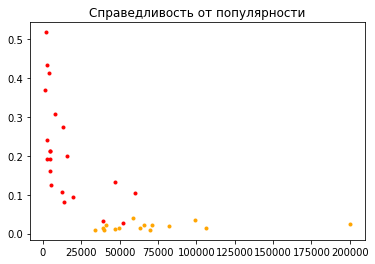

In [16]:
plt.title("Справедливость от популярности")
plt.scatter(bel_views_mean, bel_df_coefs["Коэф. справедливости"], marker=".", c="red")
plt.scatter(pop_views_mean, pop_df_coefs["Коэф. справедливости"], marker=".", c="orange")
plt.show()

Но скорее всего, зависимость будет не столько от популярности, сколько от количества песен. Ведь когда песен немного, проще сыграть все из них. Посмотрим:

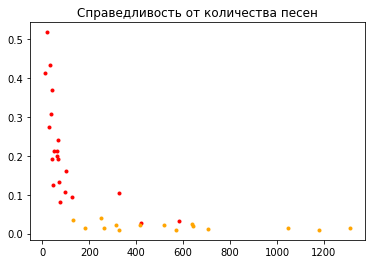

In [17]:
plt.title("Справедливость от количества песен")
bel_numbers = [value.size for key, value in bel_data.items()]
pop_numbers = [value.size for key, value in pop_data.items()]
plt.scatter(bel_numbers, bel_df_coefs["Коэф. справедливости"], marker=".", c="red")
plt.scatter(pop_numbers, pop_df_coefs["Коэф. справедливости"], marker=".", c="orange")
plt.show()

По всей видимости, предположение оказалось верным.

Наши результаты для белорусов в одной таблице:

In [18]:
bel_res = pd.DataFrame({"Название" : bel_names, 
                         "Среднее по просмотрам" : bel_views_mean, 
                         "Самая популярная песня" : bel_views_max_name, 
                         "Просмотры" : bel_views_max_views,
                         "Коэфы справедливости" : bel_df_coefs["Коэф. справедливости"]})
bel_res

,Название,Среднее по просмотрам,Самая популярная песня,Просмотры,Коэфы справедливости
0,N.R.M.,13692.95,Тры чарапахi,166353,0.082313
1,Nizkiz,8149.83,Лирика,26527,0.307228
2,Ляпис Трубецкой,52447.73,В платье белом,1843742,0.028446
3,ЛСП,19763.86,Тело,208451,0.094813
4,Кассиопея,2062.30,Алеся-телеглаз,3993,0.516479
5,Без Билета,4301.27,По ветру,20391,0.210940
6,Лявон Вольскі,4672.54,Маё каханне,22009,0.212301
7,J:Морс,2670.97,Босиком по мостовой,14042,0.190213
8,Нейро Дюбель,4483.25,Резиновый дом,23308,0.192348
9,Разбітае Сэрца Пацана,3946.17,Розавы закат,9602,0.410974


Спасибо за внимание!